In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from importlib import reload
import evaluations


/tmp/ipykernel_2541/1926016888.py:17: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(im)
/tmp/ipykernel_2541/1926016888.py:20: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(im)


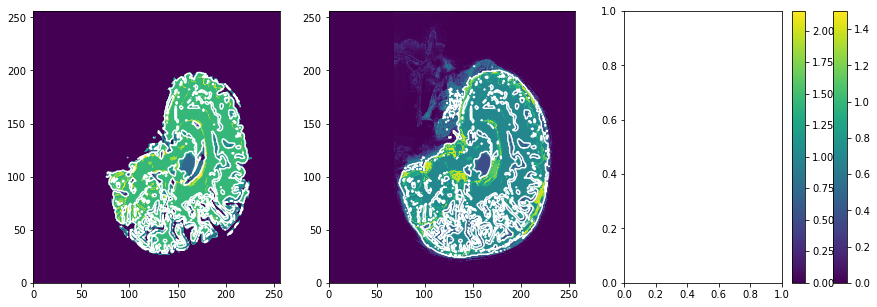

In [28]:

tissue_prob_map = loadmat('/home/anne/Masterarbeit/masterarbeit/2d//data/TPMSliceAnne.mat')

white_prob = tissue_prob_map['tpm']['white'][0][0]
gray_prob = tissue_prob_map['tpm']['gray'][0][0]
csf_prob = tissue_prob_map['tpm']['csf'][0][0]
skull_prob = tissue_prob_map['tpm']['skull'][0][0]
scalp_prob = tissue_prob_map['tpm']['scalp'][0][0]

head =  white_prob + gray_prob + csf_prob + skull_prob # + scalp_prob
inner =  white_prob + gray_prob + csf_prob
brain = white_prob + gray_prob

fig, axis = plt.subplots(1,3, figsize=(15,5))

axis[0].contour(brain, levels=[0.95], colors=['white'])
im = axis[0].pcolor(brain)
fig.colorbar(im) 
axis[1].contour(head, levels=[0.95], colors=['white'])
im = axis[1].pcolor(head)
fig.colorbar(im) 

36
18
9
0.44705884996801615


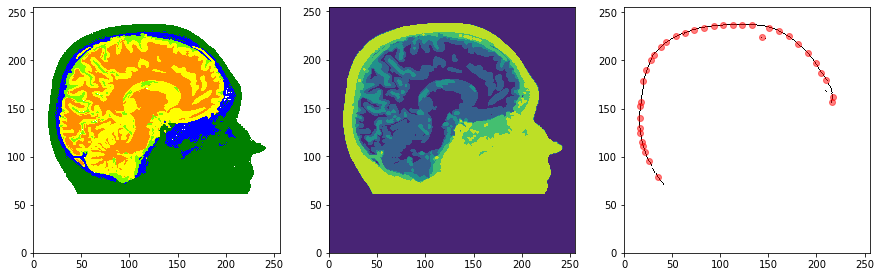

In [29]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

fig, axis = plt.subplots(1,3, figsize=(15,5))

x = np.linspace(0, 1, 256)
y = np.linspace(0, 1, 256)
z = np.ndarray((256,256))
zz = np.ndarray((256,256))
g = np.ndarray((256,256))
s = np.ndarray((256,256))
z1 = np.ndarray((256,256))
boundary = np.zeros((256,256))

for i in range(256):
    for j in range(256):
        probs = [gray_prob[i,j],white_prob[i,j],skull_prob[i,j],csf_prob[i,j],scalp_prob[i,j]]
        g[j,i] = gray_prob[i,j]
        s[j,i] = scalp_prob[i,j]
        if white_prob[i,j]>0.5: 
            z[j,i]=1
        elif gray_prob[i,j]>0.5: 
            z[j,i]=2
        elif csf_prob[i,j]>0.5: 
            z[j,i]=3
        elif skull_prob[i,j]>0.5: 
            z[j,i]=4
        elif scalp_prob[i,j]>0.5: 
            z[j,i]=5
        else:
            z[j,i]=0

for i in range(256):
    for j in range(256):
        probs = [gray_prob[i,j],white_prob[i,j],csf_prob[i,j],skull_prob[i,j],scalp_prob[i,j]]
        if white_prob[i,j]>0.5: 
            z1[j,i]=1
        elif (gray_prob[i,j] + white_prob[i,j])>0.5: 
            z1[j,i]=2
        elif (csf_prob[i,j] + gray_prob[i,j] + white_prob[i,j])>0.5: 
            z1[j,i]=3
        elif (skull_prob[i,j]+csf_prob[i,j] + gray_prob[i,j] + white_prob[i,j])>0.5: 
            z1[j,i]=4
        elif (scalp_prob[i,j]+csf_prob[i,j]+skull_prob[i,j] + gray_prob[i,j] + white_prob[i,j])>0.5: 
            z1[j,i]=5
        else:
            z1[j,i]=0
b = []
for i in range(255):
    for j in range(255):
        if (z[j,i] == 5 
        and (z[j-1,i] == 0 or z[j+1,i] == 0 or z[j,i-1] == 0 or z[j,i+1] == 0)
        and (j>155 or (j>70 and i<45))
        and (z[j-1,i] == 5 or z[j+1,i] == 5 or z[j,i-1] == 5 or z[j,i+1] == 5 or z[j-1,i-1] == 5 or z[j+1,i+1] == 5)):
            boundary[j,i] = 1
            b.append([i,j])
     
cmap = ListedColormap(["white", "darkorange", "yellow", "lawngreen", "blue", "green"])
set = axis[0].pcolor(z1, cmap=cmap)
set = axis[1].contourf(z1, levels = [0,1,2,3,4,5])
set = axis[2].pcolor(boundary, cmap='Greys')
axis[0].set_aspect(1)
axis[1].set_aspect(1)
axis[2].set_aspect(1)

electrodes_1 = []
electrodes_2 = []
electrodes_3 = []

for k in range(0,len(b),10):
    electrodes_3.append(b[k])

for k in range(0,len(electrodes_3),2):
    electrodes_2.append(electrodes_3[k])

for k in range(0,len(electrodes_2),2):
    electrodes_1.append(electrodes_2[k])

print(len(electrodes_3))
print(len(electrodes_2))
print(len(electrodes_1))

np.savez_compressed("/home/anne/Masterarbeit/masterarbeit/2d/data/electrodes_3.npz", electrodes_3)
np.savez_compressed("/home/anne/Masterarbeit/masterarbeit/2d/data/electrodes_2.npz", electrodes_2)
np.savez_compressed("/home/anne/Masterarbeit/masterarbeit/2d/data/electrodes_1.npz", electrodes_1)

print(g[170,150])
#evaluations.draw_point(axis[1], [150,170], alpha=1)
#evaluations.draw_point(axis[1], [142,152], alpha=1)


electrodes = np.array(electrodes_3)
axis[2].scatter(electrodes[:,0], electrodes[:,1], c='red', alpha=0.5)

plt.show()


[16. 16.]
1.0
[32. 32.]
0.9369981828285784
[65. 64.]
1.0
[130. 128.]
1.0


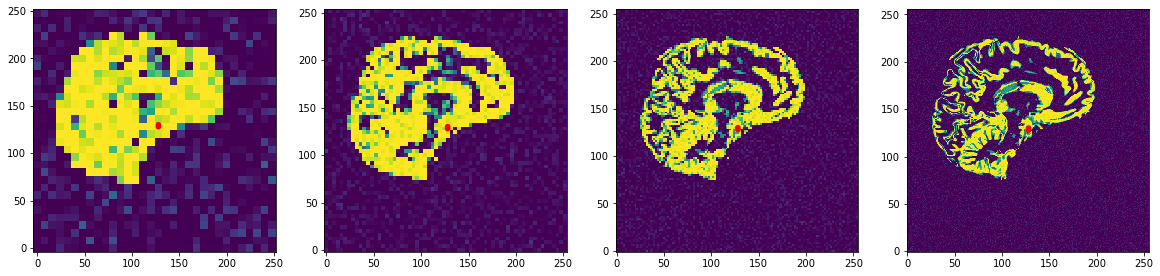

In [30]:
from os import name
import utility_functions
import evaluations

fig, axis = plt.subplots(1,4, figsize=(20,5))

paths = [
    "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_32.npz",
    "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_64.npz",
    "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_128.npz",
    "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_256.npz"]
numbers = [32,64,128,256]

point = [130,128]
start = [128,128]
for i in range(4):
    n = numbers[i]

    mesh = np.load(paths[i])

    elements = mesh['elements']
    nodes = mesh['nodes']
    labels = mesh['labels']
    gray_probs = mesh['gray_probs']
    
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    z = np.ndarray((n,n),float)
    g = np.ndarray((n,n),float)

    x = nodes[:n,0]
    y = nodes[:n,0]

    for k in range(n):
        for j in range(n):
            z[k,j] = labels[k+n*j]
            g[k,j] = gray_probs[k+n*j]

    axis[i].pcolormesh(x,y,g)
    axis[i].set_aspect(1)
    evaluations.draw_point(axis[i], [start[1],start[0]], alpha=1)

    evaluations.draw_point(axis[i], [point[1],point[0]], alpha=1)

    c = utility_functions.find_next_center(mesh,'hex',point)
    print(c)
    print(g[int(c[0]),int(c[1])])
    
plt.show()


In [31]:
import json
import eeg_model
import math

##### READ CONFIG #####
# Get path to config file
parameters_path = "/home/anne/Masterarbeit/masterarbeit/2d/configs/mlda_with_orientation.json"

# Read config file
file = open(parameters_path)
config = json.load(file)
file.close()

##### SET GENERAL CONFIGS #####
model = config["Setup"]["Matrix"]
relative_noise = config["ModelConfig"]["RelativeNoise"]
center = (config["Geometry"]["Center"]["x"], config["Geometry"]["Center"]["y"])
conductivities = config["Geometry"]["Conductivities"]
chains = config["Setup"]["Chains"]

# Set type
dipole_type = config["ModelConfig"]["Dipole"]["Type"]

##### SET DIPOLE #####
# Dipole position is either read from the config or generated randomly
s_ref = {}
for c in range(chains):
    print(c)
    if config["Setup"]["Dipole"] == "Random":
        mesh_ref = np.load(config["GeneralLevelConfig"]["Reference"]["Mesh"] if "Reference" in config["GeneralLevelConfig"]
                           else config[config["Sampling"]["Levels"][-1]]["Reference"]["Mesh"])
        while (True):
            position = (utility_functions.get_random(config["Geometry"]["Domain_x_Min"], config["Geometry"]["Domain_x_Max"]),
                        utility_functions.get_random(config["Geometry"]["Domain_y_Min"], config["Geometry"]["Domain_y_Max"]))
            center_ref = utility_functions.find_next_center(
                mesh_ref, 'hex', position)
            if (mesh_ref['gray_probs'][int(center_ref[0]+mesh_ref['cells_per_dim']*center_ref[1])] > 0.5):
                break
    else:
        position = (config["ModelConfig"]["Dipole"]["Position"]
                    ["x"], config["ModelConfig"]["Dipole"]["Position"]["y"])

    # Dipole orientation is either radial or given by the config or generated randomly
    if dipole_type == 'Radial':
        s_ref[c] = utility_functions.get_radial_dipole(position, center)
    else:
        if config["Setup"]["Dipole"] == "Random":
            rho = utility_functions.get_random(0, 2*math.pi)
        else:
            rho = config["ModelConfig"]["Dipole"]["Orientation"]["rho"]

        print("Dipole:")
        print(utility_functions.get_dipole(position, center, rho))
        s_ref[c] = utility_functions.get_dipole(position, center, rho)

    ##### COMPUTE REFERENCE SENSOR VALUES #####
    # Read configs yielding for all levels
    general_level_config = config["GeneralLevelConfig"]

    if "Reference" in general_level_config:
        b_ref_general = {}
        sigma_0_general = {}
        for c in range(chains):
            transfer_matrix = general_level_config["Reference"]["TransferMatrix"]
            mesh = general_level_config["Reference"]["Mesh"]
            source_model = general_level_config["Reference"]["SourceModel"]
            config_source = config[source_model]
            b_ref_general[c], sigma_0_general[c] = utility_functions.calc_disturbed_sensor_values(s_ref[c], transfer_matrix, mesh, conductivities, config_source, relative_noise)

    ##### SET LEVEL DEPENDENT CONFIGS #####
    # Initialize dictionairies
    path_electrodes = {}
    mesh_types = {}
    path_meshs = {}
    path_matrices = {}
    var_factor = {}
    b_ref = {}
    sigma = {}

    # Iterate through all levels
    levels = config["Sampling"]["Levels"]
    for level in levels:
        # Read config yielding for the current level
        level_config = config[level]

        # Set paths
        path_electrodes[level] = level_config["Electrodes"] if "Electrodes" in level_config else general_level_config["Electrodes"]
        path_meshs[level] = level_config["Mesh"] if "Mesh" in level_config else general_level_config["Mesh"]
        var_factor[level] = level_config["VarFactor"] if "VarFactor" in level_config else general_level_config["VarFactor"]
        mesh_types[level] = level_config["MeshType"] if "MeshType" in level_config else general_level_config["MeshType"]

        path_matrices[level] = level_config["TransferMatrix"] if "TransferMatrix" in level_config else general_level_config["TransferMatrix"]

        m = len(np.load(path_electrodes[level])["arr_0"])

        b_ref[level] = b_ref_general
        sigma[level] = sigma_0_general

    ##### CREATE EEG MODEL #####
    # Either transfer matrix or leadfield matrix is used in the model
    print(path_electrodes)
    
    if model == 'T':
        testmodel = eeg_model.EEGModelTransfer(config, levels, b_ref, sigma, path_matrices,
                                     mesh_types, path_meshs, conductivities, center, dipole_type)
    elif model == 'L':
        testmodel = eeg_model.EEGModelLeadfield(
            levels, b_ref, sigma, path_matrices, path_meshs)


KeyError: 'Dipole'

In [ ]:
import leadfield

chain = 0
level = "Level3_V"
theta = np.array([130,128,0])

print(testmodel.b_ref[level][chain])

next_dipole = utility_functions.get_dipole(theta[0:2], testmodel.center, theta[2])
b = testmodel.meg_drivers[level].applyEEGTransfer(testmodel.transfer_matrix[level],[next_dipole],testmodel.config[level])[0]
#print(b)

posterior = ((1/(2*testmodel.sigma[level][chain]**2))**(testmodel.m[level]/2))*np.exp(-(1/(2*testmodel.sigma[level][chain]**2))*(np.linalg.norm(np.array(testmodel.b_ref[level][chain])-np.array(b), 2)/np.linalg.norm(np.array(testmodel.b_ref[level][chain]), 2))**2)
print(testmodel.sigma[level][chain])



print("___________________________________________________")
print("NORM")
print(np.linalg.norm(np.array(testmodel.b_ref[level][chain])-np.array(b), 2))

print("POSTERIOR")
print(posterior)
print(np.log(posterior))
print(testmodel.posterior(theta, chain, level))

c = utility_functions.find_next_center(testmodel.mesh[level],testmodel.mesh_type[level],theta)
tissue_prob = testmodel.tissue_probs[level][int(c[0]+testmodel.mesh[level]['cells_per_dim']*c[1])]
print(tissue_prob)

print("___________________________________________________")
theta = np.array([122,122,-8])

next_dipole = utility_functions.get_dipole(theta[0:2], testmodel.center, theta[2])
b = testmodel.meg_drivers[level].applyEEGTransfer(testmodel.transfer_matrix[level],[next_dipole],testmodel.config[level])[0]
#print(b)

posterior = ((1/(2*testmodel.sigma[level][chain]**2))**(testmodel.m[level]/2))*np.exp(-(1/(2*testmodel.sigma[level][chain]**2))*(np.linalg.norm(np.array(testmodel.b_ref[level][chain])-np.array(b), 2)/np.linalg.norm(np.array(testmodel.b_ref[level][chain]), 2))**2)
print("NORM")
print(np.linalg.norm(np.array(testmodel.b_ref[level][chain])-np.array(b), 2))

print("POSTERIOR")
print(posterior)
print(np.log(posterior))
print(testmodel.posterior(theta, chain, level))

c = utility_functions.find_next_center(testmodel.mesh[level],testmodel.mesh_type[level],theta)
tissue_prob = testmodel.tissue_probs[level][int(c[0]+testmodel.mesh[level]['cells_per_dim']*c[1])]
print(tissue_prob)


NameError: name 'testmodel' is not defined

In [ ]:
chain = 0
theta = np.array([130,125,0])

print(testmodel.config)

level = "Level3_P"

#print(testmodel.b_ref[level][chain])

next_dipole = utility_functions.get_dipole(theta[0:2], testmodel.center, theta[2])
b = testmodel.meg_drivers[level].applyEEGTransfer(testmodel.transfer_matrix[level],[next_dipole],testmodel.config[level])[0]
print(b)

posterior = ((1/(2*testmodel.sigma[level][chain]**2))**(testmodel.m[level]/2))*np.exp(-(1/(2*testmodel.sigma[level][chain]**2))*(np.linalg.norm(np.array(testmodel.b_ref[level][chain])-np.array(b), 2)/np.linalg.norm(np.array(testmodel.b_ref[level][chain]), 2))**2)
#print(testmodel.sigma[level][chain])

level = "Level3_V"

#print(testmodel.b_ref[level][chain])

next_dipole = utility_functions.get_dipole(theta[0:2], testmodel.center, theta[2])
b = testmodel.meg_drivers[level].applyEEGTransfer(testmodel.transfer_matrix[level],[next_dipole],testmodel.config[level])[0]
print(b)

posterior = ((1/(2*testmodel.sigma[level][chain]**2))**(testmodel.m[level]/2))*np.exp(-(1/(2*testmodel.sigma[level][chain]**2))*(np.linalg.norm(np.array(testmodel.b_ref[level][chain])-np.array(b), 2)/np.linalg.norm(np.array(testmodel.b_ref[level][chain]), 2))**2)
#print(testmodel.sigma[level][chain])

chain = 0
theta = np.array([129,125,0])

print(testmodel.config)

level = "Level3_P"

#print(testmodel.b_ref[level][chain])

next_dipole = utility_functions.get_dipole(theta[0:2], testmodel.center, theta[2])
b = testmodel.meg_drivers[level].applyEEGTransfer(testmodel.transfer_matrix[level],[next_dipole],testmodel.config[level])[0]
print(b)

posterior = ((1/(2*testmodel.sigma[level][chain]**2))**(testmodel.m[level]/2))*np.exp(-(1/(2*testmodel.sigma[level][chain]**2))*(np.linalg.norm(np.array(testmodel.b_ref[level][chain])-np.array(b), 2)/np.linalg.norm(np.array(testmodel.b_ref[level][chain]), 2))**2)
#print(testmodel.sigma[level][chain])

level = "Level3_V"

#print(testmodel.b_ref[level][chain])

next_dipole = utility_functions.get_dipole(theta[0:2], testmodel.center, theta[2])
b = testmodel.meg_drivers[level].applyEEGTransfer(testmodel.transfer_matrix[level],[next_dipole],testmodel.config[level])[0]
print(b)

posterior = ((1/(2*testmodel.sigma[level][chain]**2))**(testmodel.m[level]/2))*np.exp(-(1/(2*testmodel.sigma[level][chain]**2))*(np.linalg.norm(np.array(testmodel.b_ref[level][chain])-np.array(b), 2)/np.linalg.norm(np.array(testmodel.b_ref[level][chain]), 2))**2)
#print(testmodel.sigma[level][chain])


{'Level1_V': {'solver.reduction': 1e-10, 'source_model': {'type': 'venant', 'numberOfMoments': 2, 'referenceLength': 20, 'weightingExponent': 1, 'relaxationFactor': 1e-06, 'mixedMoments': True, 'restrict': True, 'initialization': 'closest_vertex'}, 'post_process': True, 'subtract_mean': True}, 'Level3_V': {'solver.reduction': 1e-10, 'source_model': {'type': 'venant', 'numberOfMoments': 2, 'referenceLength': 20, 'weightingExponent': 1, 'relaxationFactor': 1e-06, 'mixedMoments': True, 'restrict': True, 'initialization': 'closest_vertex'}, 'post_process': True, 'subtract_mean': True}}


KeyError: 'Level3_P'